In [1]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
import numpy as np
import pandas as pd
from sklearn.compose import make_column_selector as selector

In [2]:
data=pd.read_csv('regression_data.csv')

In [3]:
data

,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,EmploymentDurationCurrentEmployer,...,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,RecoveryStage,Rating,Restructured,CreditScoreEsMicroL,Default
0,0.0,0.0,115.0410,61,319.5582,115.0408,30.00,12,101.13,UpTo3Years,...,Vocational education,other,Fully employed,NaN,other,Recovery,HR,False,M,Not Defaulter
1,0.0,0.0,140.6057,48,191.7349,140.6057,25.00,1,101.13,MoreThan5Years,...,Higher education,Married,Fully employed,Other,other,Recovery,HR,False,M,Not Defaulter
2,0.0,0.0,319.5580,58,319.5582,319.5409,25.00,20,101.13,Other,...,Secondary education,other,Fully employed,Mining,other,Recovery,HR,True,M,Defaulter
3,0.0,0.0,57.5205,23,127.8233,57.5205,45.00,15,101.13,UpTo3Years,...,Basic education,Cohabitant,Self-employed_Entrepreneur_Retiree,Processing,other,Recovery,HR,False,M,Not Defaulter
4,0.0,0.0,319.5582,25,319.5582,319.5436,30.00,12,101.13,UpTo3Years,...,Secondary education,Single,Fully employed,NaN,other,Recovery,HR,False,M,Defaulter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515.0,0.0,485.0000,37,3000.0000,3000.0000,31.01,60,107.68,MoreThan5Years,...,Vocational education,Cohabitant,Fully employed,Processing,Council house,Recovery,D,False,M,Defaulter
77390,1880.0,0.0,1120.0000,35,3000.0000,3000.0000,18.25,60,85.33,MoreThan5Years,...,Vocational education,Cohabitant,Fully employed,Construction,Owner,Collection,B,False,M,Not Defaulter
77391,1975.0,0.0,525.0000,40,2500.0000,2500.0000,24.83,60,80.42,MoreThan5Years,...,Vocational education,other,Self-employed_Entrepreneur_Retiree,Retail and wholesale,Owner,Recovery,HR,False,M,Defaulter
77392,1840.0,0.0,1160.0000,47,3000.0000,3000.0000,17.74,60,84.51,MoreThan5Years,...,Higher education,other,Fully employed,Hospitality and catering,Tenant_unfurnished propert,Recovery,B,True,M,Defaulter


In [4]:
data['Default']=data['Default'].map({'Defaulter':1,'Not Defaulter':0})
data['Default'].value_counts()

1    42794
0    34600
Name: Default, dtype: int64

In [5]:
data.isnull().sum()

BidsPortfolioManager                         0
BidsApi                                      0
BidsManual                                   0
Age                                          0
AppliedAmount                                0
Amount                                       0
Interest                                     0
LoanDuration                                 0
MonthlyPayment                               0
EmploymentDurationCurrentEmployer            0
IncomeTotal                                  0
ExistingLiabilities                          0
LiabilitiesTotal                             0
RefinanceLiabilities                         0
DebtToIncome                                 0
FreeCash                                     0
MonthlyPaymentDay                            0
CreditScoreEeMini                            0
PrincipalPaymentsMade                        0
InterestAndPenaltyPaymentsMade               0
PrincipalBalance                             0
InterestAndPe

In [10]:
# Step 1 -> train/test/split
X = data.drop(['Default','EMI', 'ELA', 'ROI'], axis=1)
y = data['Default']

In [11]:
y

0        0
1        0
2        1
3        0
4        1
        ..
77389    1
77390    0
77391    1
77392    1
77393    1
Name: Default, Length: 77394, dtype: int64

In [12]:
cat_cols=X.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['EmploymentDurationCurrentEmployer', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Gender', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus', 'OccupationArea',
       'HomeOwnershipType', 'RecoveryStage', 'Rating', 'Restructured',
       'CreditScoreEsMicroL'],
      dtype='object')

In [13]:
num_cols=X.select_dtypes(include=['int','float']).columns
num_cols

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [15]:
ind=[]
for i in cat_cols:
    index=data.columns.get_loc(i)
    ind.append(index)

In [17]:
ind

[9, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]

In [16]:
ind_num=[]
for i in num_cols:
    index=data.columns.get_loc(i)
    ind_num.append(index)

In [18]:
ind_num

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix,precision_score
import catboost as ctb

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_pipeline = GradientBoostingClassifier(n_estimators=550, learning_rate=1.0,max_depth=13, random_state=0)
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [21]:
from sklearn import set_config
set_config(display="diagram")

In [22]:
numeric_processor=Pipeline(
    steps=[("imputation_mean",SimpleImputer(missing_values=np.nan,strategy="mean")),
          ("scaler",StandardScaler())]

)

In [23]:
categorical_processor=Pipeline(
    steps=[("imputation_mode",SimpleImputer(strategy='most_frequent')),
          ("onehot",OneHotEncoder(drop='first',sparse=False,handle_unknown="ignore"))]

)

In [24]:
preprocessor=ColumnTransformer(
    [("categorical",categorical_processor,selector(dtype_exclude=['int','float'])),
    ("numerical",numeric_processor,selector(dtype_include=['int','float']))]


)

In [25]:
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002802788DDF0>),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000280322FC190>)])

In [39]:
pipe=make_pipeline(preprocessor,gboost_pipeline)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002802788DDF0>),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000280322FC190>)])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=13,
                                            n_estimators=550,
                                            random_state=0))])

In [40]:
gboost_pipeline=pipe.fit(X_train,y_train)

In [41]:
gboost_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002802788DDF0>),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000280322FC190>)])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=13,
                                            n_estimators=550,
                                            random_state=0))])

In [45]:
y_pred=gboost_pipeline.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6918
           1       0.98      0.94      0.96      8561

    accuracy                           0.96     15479
   macro avg       0.96      0.96      0.96     15479
weighted avg       0.96      0.96      0.96     15479



[[6774  144]
 [ 489 8072]]


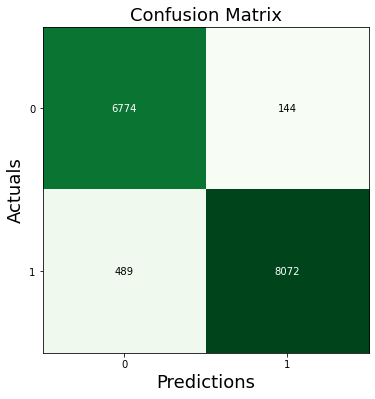

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [48]:
print("ACCURACY SCORE:",accuracy_score(y_test,y_pred))
print("ROC_AUC CURVE",roc_auc_score(y_test,y_pred))

ACCURACY SCORE: 0.9591058853931133
ROC_AUC CURVE 0.9610326200433135


In [50]:
import pickle
pickle.dump(gboost_pipeline,open('C:/Users/ASUS/TECHNOCOLAB_INTERNSHIP/ML_DEPLOYMENT_MODELS/classifier_gboost_pipeline.pkl',"wb"))

In [52]:
load_pipe=pickle.load(open('ML_DEPLOYMENT_MODELS/classifier_gboost_pipeline.pkl','rb'))
y_pred=load_pipe.predict(X_test)

In [53]:
print("ACCURACY SCORE:",accuracy_score(y_test,y_pred))
print("ROC_AUC CURVE",roc_auc_score(y_test,y_pred))

ACCURACY SCORE: 0.9591058853931133
ROC_AUC CURVE 0.9610326200433135
